# End to End Function
* Compares Hunter College, CCNY, Medgar Evers, Columbia, NYU as the origin station
* Proivde a time frame
* Provide a year to explore
* Provide the complete datasets
* Outputs a histogram comparing the stations' ridership

## Helper Functions

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def filter_time(hunter_total, ccny_total, 
                medgar_total, columbia_total,
                nyu_total, start_time, end_time):
    
    hunter_time_filtered = hunter_total[(hunter_total["Hour of Day"] >= start_time) & (hunter_total["Hour of Day"] <= end_time)]
    ccny_time_filtered = ccny_total[(ccny_total["Hour of Day"] >= start_time) & (ccny_total["Hour of Day"] <= end_time)]
    medgar_time_filtered = medgar_total[(medgar_total["Hour of Day"] >= start_time) & (medgar_total["Hour of Day"] <= end_time)]
    columbia_time_filtered = columbia_total[(columbia_total["Hour of Day"] >= start_time) & (columbia_total["Hour of Day"] <= end_time)]
    nyu_time_filtered = nyu_total[(nyu_total["Hour of Day"] >= start_time) & (nyu_total["Hour of Day"] <= end_time)]

    return hunter_time_filtered, ccny_time_filtered, medgar_time_filtered, columbia_time_filtered, nyu_time_filtered

In [3]:
def filter_day(hunter_total, ccny_total, 
                medgar_total, columbia_total,
                nyu_total, day_of_week):
    hunter_day_filtered = hunter_total[hunter_total["Day of Week"] == day_of_week]
    ccny_day_filtered = ccny_total[ccny_total["Day of Week"] == day_of_week]
    medgar_day_filtered = medgar_total[medgar_total["Day of Week"] == day_of_week]
    columbia_day_filtered = columbia_total[columbia_total["Day of Week"] == day_of_week]
    nyu_day_filtered = nyu_total[nyu_total["Day of Week"] == day_of_week]
    
    return hunter_day_filtered, ccny_day_filtered, medgar_day_filtered, columbia_day_filtered, nyu_day_filtered

In [4]:
def average_ridership_df(station_id, dataset):
    data = []  # List to store dictionary records
    
    average_ridership = dataset[dataset["Destination Station Complex ID"] == station_id]
    
    for year in [2021, 2022, 2023, 2024]:
        yearly_ridership = 0

        for month in range(1, 13):
            monthly_ridership = 0

            for day in ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]:
                amount = average_ridership[
                    (average_ridership["Year"] == year) & 
                    (average_ridership["Month"] == month) & 
                    (average_ridership["Day of Week"] == day)
                ]["Estimated Average Ridership"].sum()
                
                adjusted_amount = amount * 4  # Adjusted for 4 weeks per month
                
                # Append data in structured format
                data.append({
                    "Year": year,
                    "Month": month,
                    "DayOfWeek": day,
                    "Ridership": adjusted_amount
                })

                monthly_ridership += adjusted_amount

            # Append monthly total
            data.append({
                "Year": year,
                "Month": month,
                "DayOfWeek": "Total",
                "Ridership": monthly_ridership
            })

            yearly_ridership += monthly_ridership

        # Append yearly total
        data.append({
            "Year": year,
            "Month": "Total",
            "DayOfWeek": "Total",
            "Ridership": yearly_ridership
        })
    
    # Convert list of records into a DataFrame
    df = pd.DataFrame(data)
    return df

In [5]:
def compute_ridership(hunter_filtered, ccny_filtered, 
                      medgar_filtered, columbia_filtered, 
                      nyu_filtered, station_id):
    
    hunter_ridership = average_ridership_df(station_id, hunter_filtered)
    ccny_ridership = average_ridership_df(station_id, ccny_filtered)
    medgar_ridership = average_ridership_df(station_id, medgar_filtered)
    columbia_ridership = average_ridership_df(station_id, columbia_filtered)
    nyu_ridership = average_ridership_df(station_id, nyu_filtered)

    return hunter_ridership, ccny_ridership, medgar_ridership, columbia_ridership, nyu_ridership

In [6]:
def compare_annual_ridership(year, df_hunter, df_ccny, df_medgar, df_columbia, df_nyu, station_id):
    datasets = [df_hunter, df_ccny, df_medgar, df_columbia, df_nyu]
    station_names = ["Hunter College", "CCNY", "Medgar Evers", "Columbia", "NYU"]
    total_ridership = []

    for df in datasets:
        # Filter for the given year and the "Total" row
        df_filtered = df[(df["Year"] == year) & 
                         (df["Month"] == "Total") & 
                         (df["DayOfWeek"] == "Total")]
        
        if not df_filtered.empty:
            total_ridership.append(df_filtered["Ridership"].values[0])  # Extract ridership value
        else:
            total_ridership.append(0)  # Default to 0 if no data is found

    # Plot the bar chart
    plt.figure(figsize=(8, 5))
    plt.bar(station_names, total_ridership, color=['blue', 'green', 'red', 'purple', 'orange'])
    
    # Formatting
    plt.xlabel("Station")
    plt.ylabel("Total Ridership")
    plt.title(f"Total Annual Ridership for {year} for destination {station_id}")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    
    plt.show()

## Complete End to End Function

In [7]:
# End to End Function that graphs the annual ridership for a given destination station, time frame, and year
def compare_ridership_by_station(hunter_total, ccny_total, 
                medgar_total, columbia_total,
                nyu_total, start_time, end_time,
                station_id, year, day_of_week=None):
    
    hunter_filtered, ccny_filtered, medgar_filtered, columbia_filtered, nyu_filtered = filter_time(hunter_total,
                                                                                                   ccny_total,
                                                                                                   medgar_total,
                                                                                                   columbia_total,
                                                                                                   nyu_total,
                                                                                                   start_time, 
                                                                                                   end_time)
    
    if day_of_week is not None:
        hunter_filtered, ccny_filtered, medgar_filtered, columbia_filtered, nyu_filtered = filter_day(hunter_filtered,
                                                                                                       ccny_filtered,
                                                                                                       medgar_filtered,
                                                                                                       columbia_filtered,
                                                                                                       nyu_filtered,
                                                                                                       day_of_week)
    
    hunter_ridership, ccny_ridership, medgar_ridership, columbia_ridership, nyu_ridership = compute_ridership(hunter_filtered, 
                                                                                                              ccny_filtered, 
                                                                                                              medgar_filtered, 
                                                                                                              columbia_filtered,
                                                                                                              nyu_filtered,
                                                                                                              station_id)
    
    compare_annual_ridership(year, hunter_ridership, ccny_ridership, medgar_ridership, columbia_ridership, nyu_ridership, station_id)


## Experiment

In [3]:
hunter1 = pd.read_csv("datasets/hunter/MTA_Subway_Origin-Destination_2021_Hunter_Origin.csv")
hunter2 = pd.read_csv("datasets/hunter/MTA_Subway_Origin-Destination_2022_Hunter_Origin.csv")
hunter3 = pd.read_csv("datasets/hunter/MTA_Subway_Origin-Destination_2023_Hunter_Origin.csv")
hunter4 = pd.read_csv("datasets/hunter/MTA_Subway_Origin-Destination_2024_Hunter_Origin.csv")
hunter_total = pd.concat([hunter1, hunter2, hunter3, hunter4])

In [4]:
ccny1 = pd.read_csv("datasets/ccny/MTA_Subway_Origin-Destination_2021_CCNY_Origin.csv")
ccny2 = pd.read_csv("datasets/ccny/MTA_Subway_Origin-Destination_2022_CCNY_Origin.csv")
ccny3 = pd.read_csv("datasets/ccny/MTA_Subway_Origin-Destination_2023_CCNY_Origin.csv")
ccny4 = pd.read_csv("datasets/ccny/MTA_Subway_Origin-Destination_2024_CCNY_Origin.csv")
ccny_total = pd.concat([ccny1, ccny2, ccny3, ccny4])

In [5]:
medgar1 = pd.read_csv("datasets/medgar/MTA_Subway_Origin-Destination_2021_Medgar_Origin.csv")
medgar2 = pd.read_csv("datasets/medgar/MTA_Subway_Origin-Destination_2022_Medgar_Origin.csv")
medgar3 = pd.read_csv("datasets/medgar/MTA_Subway_Origin-Destination_2023_Medgar_Origin.csv")
medgar4 = pd.read_csv("datasets/medgar/MTA_Subway_Origin-Destination_2024_Medgar_Origin.csv")
medgar_total = pd.concat([medgar1, medgar2, medgar3, medgar4])

In [6]:
columbia1 = pd.read_csv("datasets/columbia/MTA_Subway_Origin-Destination_2021_Columbia_Origin.csv")
columbia2 = pd.read_csv("datasets/columbia/MTA_Subway_Origin-Destination_2022_Columbia_Origin.csv")
columbia3 = pd.read_csv("datasets/columbia/MTA_Subway_Origin-Destination_2023_Columbia_Origin.csv")
columbia4 = pd.read_csv("datasets/columbia/MTA_Subway_Origin-Destination_2024_Columbia_Origin.csv")
columbia_total = pd.concat([columbia1, columbia2, columbia3, columbia4])

In [7]:
nyu1 = pd.read_csv("datasets/nyu/MTA_Subway_Origin-Destination_2021_NYU_Origin.csv")
nyu2 = pd.read_csv("datasets/nyu/MTA_Subway_Origin-Destination_2022_NYU_Origin.csv")
nyu3 = pd.read_csv("datasets/nyu/MTA_Subway_Origin-Destination_2023_NYU_Origin.csv")
nyu4 = pd.read_csv("datasets/nyu/MTA_Subway_Origin-Destination_2024_NYU_Origin.csv")
nyu_total = pd.concat([nyu1, nyu2, nyu3, nyu4])


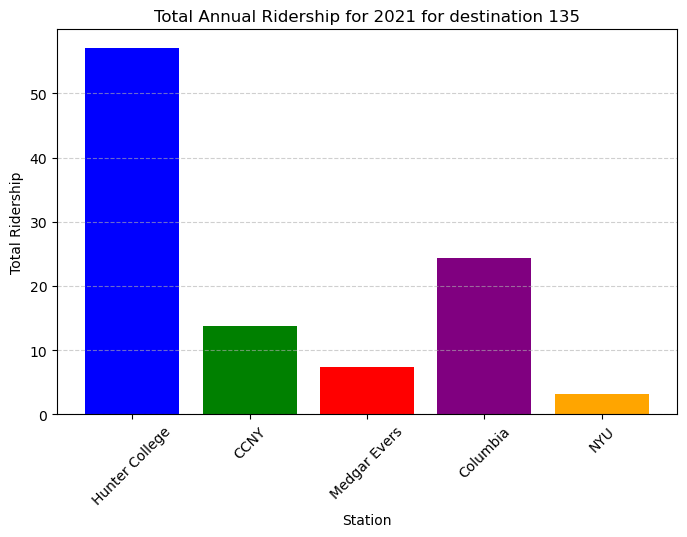

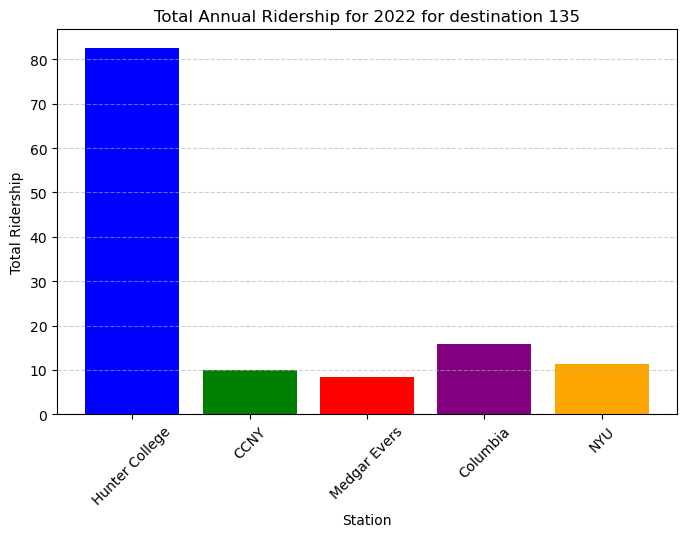

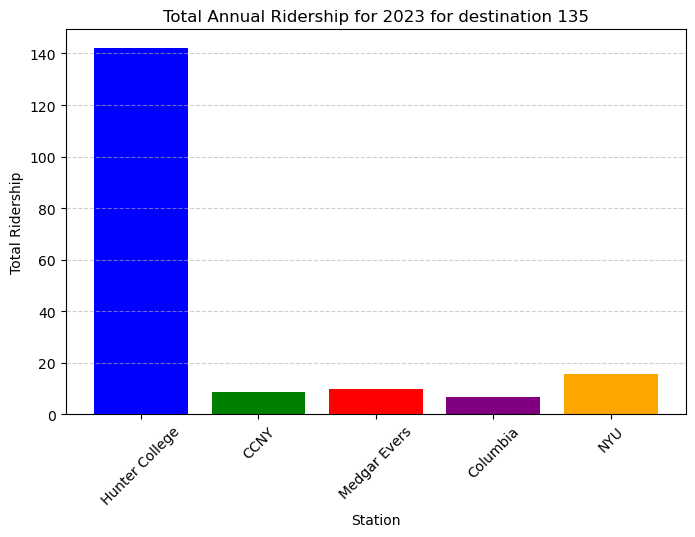

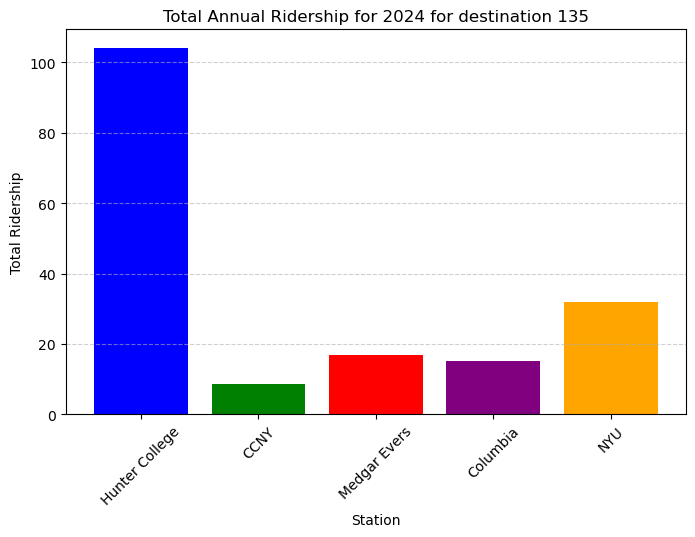

In [13]:
station_id = 135
for year in [2021, 2022, 2023, 2024]:
    compare_ridership_by_station(hunter_total, ccny_total, medgar_total, columbia_total, nyu_total, 
                                start_time=15, end_time=17, station_id=station_id, year=year, day_of_week="Monday")

# Function to plot top destinations on income map
* Computes the top n destinations of a given origin station
* Plots those destinations onto the income map of NYC

In [14]:
import folium
import geopandas as gpd
import pandas as pd
import json

# Load NYC GeoJSON (Ensure it contains ZIP codes)
geojson_file = "datasets/nyc_zipcode_geodata/nyc-zip-code-tabulation-areas-polygons.geojson"
gdf = gpd.read_file(geojson_file)

# Load ZIP Code Latitude/Longitude Data
zip_coords = pd.read_csv("datasets/nyc_zipcode_geodata/uszipcodes_geodata.csv")

# Load Income Data
income_data = pd.read_csv("datasets/nyc_median_income_zipcode.csv")

# Load MTA Subway Stations
mta_stations = pd.read_csv("datasets/MTA_Subway_Stations_and_Complexes_20250225.csv")

# Convert ZIP codes to strings for proper merging
gdf["postalCode"] = gdf["postalCode"].astype(str)
zip_coords["ZIP"] = zip_coords["ZIP"].astype(str)
income_data["zipcode"] = income_data["zipcode"].astype(str)

# Merge GeoDataFrame with ZIP code coordinates and income data
gdf = gdf.merge(zip_coords, left_on="postalCode", right_on="ZIP", how="left")
gdf = gdf.merge(income_data, left_on="postalCode", right_on="zipcode", how="left")

# Convert merged GeoDataFrame to JSON
geojson_data = json.loads(gdf.to_json())

# Define color scale based on income
def get_income_color(income):
    if pd.isna(income):
        return "gray"
    elif income < 50000:
        return "red"
    elif income < 100000:
        return "orange"
    elif income < 150000:
        return "yellow"
    elif income < 200000:
        return "lightgreen"
    else:
        return "green"
    
# Function to get the top station origins
def top_station_destinations(ridership_df, top_n=5):
    top_destinations = ridership_df.groupby(["Destination Station Complex Name", "Destination Station Complex ID", "Destination Latitude", "Destination Longitude"])["Estimated Average Ridership"].sum().sort_values(ascending=False).head(top_n)
    return top_destinations


def top_destination_income_map(ridership_df, top_n, start_time, end_time, day_of_week):

    # Filter the ridership data for the specified time range
    ridership_df = ridership_df[(ridership_df["Hour of Day"] >= start_time) & (ridership_df["Hour of Day"] <= end_time)]
    ridership_df = ridership_df[ridership_df["Day of Week"] == day_of_week]

    # Create a folium map centered on NYC
    m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

    # Add GeoJSON layer with income-based coloring and tooltips
    folium.GeoJson(
        geojson_data,
        name="NYC Neighborhoods",
        style_function=lambda x: {
            "fillColor": get_income_color(x["properties"].get("income_household_median", None)),
            "color": "black",
            "weight": 1,
            "fillOpacity": 0.6,
        },
        tooltip=folium.GeoJsonTooltip(
            fields=["postalCode", "income_household_median"],
            aliases=["ZIP Code", "Median Household Income"],
            localize=True,
        ),
    ).add_to(m)

    # Get the top destinations
    top_destinations_df = top_station_destinations(ridership_df, top_n)

    # Ensure top_destinations_df is a DataFrame
    if isinstance(top_destinations_df, pd.Series):
        top_destinations_df = top_destinations_df.reset_index()

    # Normalize ridership values for marker sizing
    max_ridership = top_destinations_df["Estimated Average Ridership"].max()
    min_radius = 5
    max_radius = 15

    # Add MTA Subway Stations as circle markers with dynamic radius
    for _, row in top_destinations_df.iterrows():
        if pd.notna(row["Destination Latitude"]) and pd.notna(row["Destination Longitude"]):
            ridership = row["Estimated Average Ridership"]
            radius = min_radius + (ridership / max_ridership) * (max_radius - min_radius)

            folium.CircleMarker(
                location=[row["Destination Latitude"], row["Destination Longitude"]],
                radius=radius,
                color="blue",
                fill=True,
                fill_color="blue",
                fill_opacity=0.7,
                popup=folium.Popup(
                    f"Station: {row['Destination Station Complex Name']}<br>"
                    f"Station ID: {row['Destination Station Complex ID']}<br>"
                    f"Ridership: {ridership:,.0f}",
                    max_width=300,
                ),
                tooltip=row["Destination Station Complex Name"],
            ).add_to(m)

    # Add origin station for reference
    origin_df = ridership_df.iloc[0]
    folium.CircleMarker(
                location=[origin_df["Origin Latitude"], origin_df["Origin Longitude"]],
                radius=10,
                color="red",
                fill=True,
                fill_color="red",
                fill_opacity=0.7,
                popup=folium.Popup(
                    f"Station: {origin_df['Origin Station Complex Name']}<br>"
                    f"Station ID: {origin_df['Origin Station Complex ID']}<br>",
                    max_width=300,
                ),
                tooltip=origin_df["Origin Station Complex Name"],
            ).add_to(m)
    
    return m

## Experiment

In [24]:
top_destination_income_map(hunter1, 15, start_time=15, end_time=16, day_of_week="Sunday")

In [25]:
top_destination_income_map(medgar1, 15, start_time=15, end_time=16, day_of_week="Sunday")

In [26]:
top_destination_income_map(ccny1, 15, start_time=15, end_time=16, day_of_week="Sunday")

In [27]:
top_destination_income_map(nyu1, 15, start_time=15, end_time=16, day_of_week="Sunday")

In [28]:
top_destination_income_map(columbia1, 15, start_time=15, end_time=16, day_of_week="Sunday")

# Timelapse using the top-ridership income map
* Add a parameter for month
* Constrain to a specific day of the week
* Starting in 2021 - 2024, go month by month and hour by hour and map the top n destinations → Combine everything together to a video or animation to see changes in real time.
* If there are certain significant changes in ridership pattern over time, it is possible that it is student activity commuting home. This depends on if the station choices can capture student activity.


In [19]:
import folium
import geopandas as gpd
import pandas as pd
import json

# Load NYC GeoJSON (Ensure it contains ZIP codes)
geojson_file = "datasets/nyc_zipcode_geodata/nyc-zip-code-tabulation-areas-polygons.geojson"
gdf = gpd.read_file(geojson_file)

# Load ZIP Code Latitude/Longitude Data
zip_coords = pd.read_csv("datasets/nyc_zipcode_geodata/uszipcodes_geodata.csv")

# Load Income Data
income_data = pd.read_csv("datasets/nyc_median_income_zipcode.csv")

# Load MTA Subway Stations
mta_stations = pd.read_csv("datasets/MTA_Subway_Stations_and_Complexes_20250225.csv")

# Convert ZIP codes to strings for proper merging
gdf["postalCode"] = gdf["postalCode"].astype(str)
zip_coords["ZIP"] = zip_coords["ZIP"].astype(str)
income_data["zipcode"] = income_data["zipcode"].astype(str)

# Merge GeoDataFrame with ZIP code coordinates and income data
gdf = gdf.merge(zip_coords, left_on="postalCode", right_on="ZIP", how="left")
gdf = gdf.merge(income_data, left_on="postalCode", right_on="zipcode", how="left")

# Convert merged GeoDataFrame to JSON
geojson_data = json.loads(gdf.to_json())

# Define color scale based on income
def get_income_color(income):
    if pd.isna(income):
        return "gray"
    elif income < 50000:
        return "red"
    elif income < 100000:
        return "orange"
    elif income < 150000:
        return "yellow"
    elif income < 200000:
        return "lightgreen"
    else:
        return "green"
    
# Function to get the top station origins
def top_station_destinations(ridership_df, top_n=5):
    top_destinations = ridership_df.groupby(["Destination Station Complex Name", "Destination Station Complex ID", "Destination Latitude", "Destination Longitude"])["Estimated Average Ridership"].sum().sort_values(ascending=False).head(top_n)
    return top_destinations


def top_destination_income_map(ridership_df, top_n, start_time, end_time, day_of_week, month, year):

    # Filter the ridership data for the specified time range
    ridership_df = ridership_df[(ridership_df["Hour of Day"] >= start_time) & (ridership_df["Hour of Day"] <= end_time)]
    ridership_df = ridership_df[ridership_df["Day of Week"] == day_of_week]
    ridership_df = ridership_df[ridership_df["Month"] == month]
    ridership_df = ridership_df[ridership_df["Year"] == year]

    # Create a folium map centered on NYC
    m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

    # Add GeoJSON layer with income-based coloring and tooltips
    folium.GeoJson(
        geojson_data,
        name="NYC Neighborhoods",
        style_function=lambda x: {
            "fillColor": get_income_color(x["properties"].get("income_household_median", None)),
            "color": "black",
            "weight": 1,
            "fillOpacity": 0.6,
        },
        tooltip=folium.GeoJsonTooltip(
            fields=["postalCode", "income_household_median"],
            aliases=["ZIP Code", "Median Household Income"],
            localize=True,
        ),
    ).add_to(m)

    # Get the top destinations
    top_destinations_df = top_station_destinations(ridership_df, top_n)

    # Ensure top_destinations_df is a DataFrame
    if isinstance(top_destinations_df, pd.Series):
        top_destinations_df = top_destinations_df.reset_index()

    # Normalize ridership values for marker sizing
    max_ridership = top_destinations_df["Estimated Average Ridership"].max()
    min_radius = 5
    max_radius = 15

    # Add MTA Subway Stations as circle markers with dynamic radius
    for _, row in top_destinations_df.iterrows():
        if pd.notna(row["Destination Latitude"]) and pd.notna(row["Destination Longitude"]):
            ridership = row["Estimated Average Ridership"]
            radius = min_radius + (ridership / max_ridership) * (max_radius - min_radius)

            folium.CircleMarker(
                location=[row["Destination Latitude"], row["Destination Longitude"]],
                radius=radius,
                color="blue",
                fill=True,
                fill_color="blue",
                fill_opacity=0.7,
                popup=folium.Popup(
                    f"Station: {row['Destination Station Complex Name']}<br>"
                    f"Station ID: {row['Destination Station Complex ID']}<br>"
                    f"Ridership: {ridership:,.0f}",
                    max_width=300,
                ),
                tooltip=row["Destination Station Complex Name"],
            ).add_to(m)

    # Add origin station for reference
    origin_df = ridership_df.iloc[0]
    folium.CircleMarker(
                location=[origin_df["Origin Latitude"], origin_df["Origin Longitude"]],
                radius=10,
                color="red",
                fill=True,
                fill_color="red",
                fill_opacity=0.7,
                popup=folium.Popup(
                    f"Station: {origin_df['Origin Station Complex Name']}<br>"
                    f"Station ID: {origin_df['Origin Station Complex ID']}<br>",
                    max_width=300,
                ),
                tooltip=origin_df["Origin Station Complex Name"],
            ).add_to(m)
    
    return m

In [35]:
top_destination_income_map(hunter_total, 15, start_time=18, end_time=19, day_of_week="Tuesday", month=1, year=2021)